In [209]:
import tensorflow as tf
import meta
%pylab inline
from matplotlib.patches import Rectangle
import numpy as np
from PIL import *
from matplotlib import pyplot as plt
import os
import scipy.io

Populating the interactive namespace from numpy and matplotlib


# visualization of TFrecord file

In [210]:
filenames = [os.path.join('/home/olle/PycharmProjects/digits/models/AlexNet/data/test', 'test.tfrecords')]

# Create a queue that produces the filenames to read.
filename_queue = tf.train.string_input_producer(filenames)

In [211]:
class SVHNRecord(object):
    pass

result = SVHNRecord()

# Dimensions of the images in the SVHN dataset.
# See http://ufldl.stanford.edu/housenumbers/ for a description of the
# input format.
result.height = 32
result.width = 32
result.depth = 3

reader = tf.TFRecordReader()
result.key, value = reader.read(filename_queue)
value = tf.parse_single_example(
    value,
    # Defaults are not specified since both keys are required.
    features={
        'image_raw': tf.FixedLenFeature(shape=[], dtype=tf.string),
        'label': tf.FixedLenFeature(shape=[], dtype=tf.int64),
    })

# Convert from a string to a vector of uint8 that is record_bytes long.
record_bytes = tf.decode_raw(value['image_raw'], tf.uint8)
# record_bytes.set_shape([32*32*3])
record_bytes = tf.reshape(record_bytes, [32, 32, 3])
print("record bytes::::: ", record_bytes)
# Store our label to result.label and convert to int32
result.label = tf.cast(value['label'], tf.int32)
result.uint8image = record_bytes

('record bytes::::: ', <tf.Tensor 'Reshape_11:0' shape=(32, 32, 3) dtype=uint8>)


In [212]:
sess = tf.InteractiveSession()
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord)

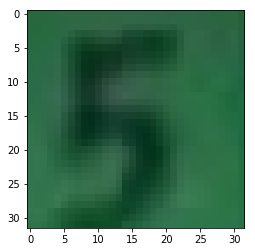

In [213]:
image_val = sess.run([result.uint8image])[0]
img = Image.fromarray(image_val, 'RGB')

plt.imshow(img, interpolation='nearest')
plt.show()

# visualization of .mat file image

In [214]:
filename_mat = os.path.join('/home/olle/PycharmProjects/digits/models/AlexNet/data/test', 'test_32x32.mat')

In [215]:
read_input = scipy.io.loadmat(filename_mat)

(32, 32, 3)


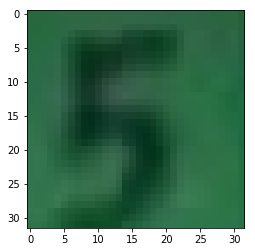

In [216]:
image_mat_val_1 = read_input['X'][:,:,:,0]
image_mat_val_10 = read_input['X'][:,:,:,10]
image_mat_val_20 = read_input['X'][:,:,:,20]
image_mat_val_30 = read_input['X'][:,:,:,30]

print(image_mat_val_1.shape)

img = Image.fromarray(image_mat_val_1, 'RGB')

plt.imshow(img, interpolation='nearest')
plt.show()

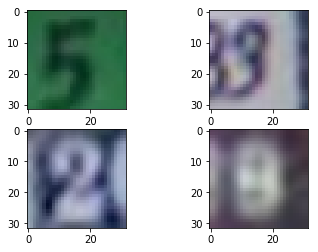

In [217]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(read_input['X'][:,:,:,0])
axarr[0,1].imshow(read_input['X'][:,:,:,10])
axarr[1,0].imshow(read_input['X'][:,:,:,20])
axarr[1,1].imshow(read_input['X'][:,:,:,30])